### Bag of words: Exercises


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [1]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable



#2. print the shape of the data


#3. print top 5 datapoints


In [2]:
df = pd.read_csv('movies_sentiment_data.csv')
print(df.shape)
df.head(5)

(19000, 2)


,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [3]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative

df['Category'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df.head(5)

,review,sentiment,Category
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive,1
1,I enjoyed the movie and the story immensely! I...,positive,1
2,I had a hard time sitting through this. Every ...,negative,0
3,It's hard to imagine that anyone could find th...,negative,0
4,This is one military drama I like a lot! Tom B...,positive,1


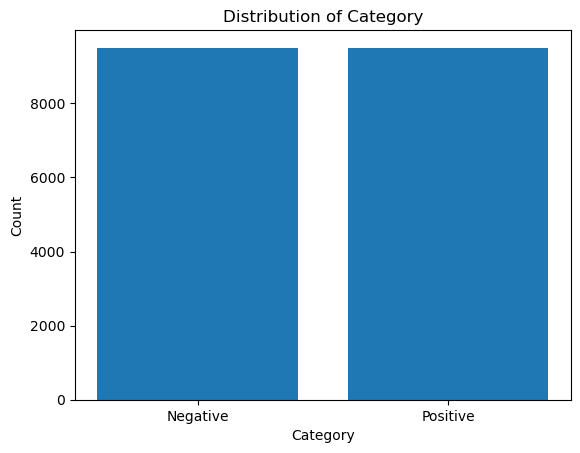

The target labels are balanced.


In [4]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.


import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame called 'df'
# If not, you can load it using pd.read_csv() or pd.read_excel()

# Check the distribution of 'Category'
category_distribution = df['Category'].value_counts()

# Plot the distribution
plt.bar(category_distribution.index, category_distribution.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Assuming 0 is negative and 1 is positive
plt.show()

# Check if the target labels are balanced or not
if len(category_distribution) == 2:
    label_counts = category_distribution.values
    if abs(label_counts[0] - label_counts[1]) <= max(label_counts) * 0.1:  # Check if the difference is within 10%
        print("The target labels are balanced.")
    else:
        print("The target labels are not balanced.")
else:
    print("The target labels are not binary.")


In [6]:
#Do the 'train-test' splitting with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df.review, df.Category, test_size=.2)


In [7]:
type(X_train)

pandas.core.series.Series

**Exercise-1**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.

**Note:**
- use CountVectorizer for pre-processing the text.

- use **Random Forest** as the classifier with estimators as 50 and criterion as entropy.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1917
           1       0.83      0.82      0.82      1883

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



**Exercise-2**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'euclidean'.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [5]:

#1. create a pipeline object


#2. fit with X_train and y_train



#3. get the predictions for X_test and store it in y_pred


#4. print the classfication report


**Exercise-3**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



In [6]:

#1. create a pipeline object



#2. fit with X_train and y_train



#3. get the predictions for X_test and store it in y_pred



#4. print the classfication report


### Can you write some observations of why model like KNN fails to produce good results unlike RandomForest and MultinomialNB?



## [**Solution**](./bag_of_words_exercise_solutions.ipynb)